# 第5章: Hypothesis Tests and Confidence Intervals in SLR（単回帰モデルの仮説検定と信頼区間）練習問題

この章では単回帰モデルにおける係数の仮説検定、信頼区間、ダミー変数、分散の均一性・不均一性について学びます。

In [1]:
# 必要なパッケージの読み込み
library(AER)
data("CASchools")
CASchools$STR <- CASchools$students / CASchools$teachers
CASchools$score <- (CASchools$read + CASchools$math) / 2

Loading required package: car



Loading required package: carData



Loading required package: lmtest



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: sandwich



Loading required package: survival



---
## 問題1: 係数の標準誤差の計算

CASchoolsデータを使って単回帰モデル score ~ STR を推定し、

1. β̂₁ の標準誤差を手計算で求めてください
   - SE(β̂₁) = SER / √(Σ(Xi - X̄)²)
2. summary()の出力と比較してください

In [2]:
# 問題1の解答欄



### 模範解答

In [3]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)

# SERの計算
n <- nrow(CASchools)
SSR <- sum(resid(model)^2)
SER <- sqrt(SSR / (n - 2))

# Σ(Xi - X̄)² の計算
TSS_X <- sum((CASchools$STR - mean(CASchools$STR))^2)

# β̂₁ の標準誤差
SE_beta1 <- SER / sqrt(TSS_X)
cat("手計算による SE(β̂₁) =", SE_beta1, "\n")

# summary()との比較
model_summary <- summary(model)
cat("summary()から取得した SE(β̂₁) =", model_summary$coefficients[2, 2], "\n")

手計算による SE(β̂₁) = 0.4798255 


summary()から取得した SE(β̂₁) = 0.4798255 


---
## 問題2: 係数の仮説検定（両側検定）

単回帰モデル score ~ STR について、

1. 帰無仮説 H₀: β₁ = 0 を検定してください
2. t統計量を計算してください
3. p値を計算してください
4. 有意水準5%で結論を述べてください

In [4]:
# 問題2の解答欄



### 模範解答

In [5]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)
model_summary <- summary(model)

# 係数と標準誤差
beta1_hat <- coef(model)[2]
SE_beta1 <- model_summary$coefficients[2, 2]

# 1-2. t統計量の計算
t_stat <- (beta1_hat - 0) / SE_beta1
cat("t統計量 =", t_stat, "\n")

# 3. p値の計算（両側検定）
df <- n - 2
p_value <- 2 * pt(-abs(t_stat), df = df)
cat("p値 =", p_value, "\n")

# summary()との比較
cat("\nsummary()からの値:\n")
cat("t統計量 =", model_summary$coefficients[2, 3], "\n")
cat("p値 =", model_summary$coefficients[2, 4], "\n\n")

# 4. 結論
cat("=== 結論 ===", "\n")
cat("p値 < 0.05 なので、帰無仮説を棄却する。\n")
cat("STRとテストスコアの間には統計的に有意な関係がある。\n")

t統計量 = -4.751327 


p値 = 2.783308e-06 



summary()からの値:


t統計量 = -4.751327 


p値 = 2.783308e-06 



=== 結論 === 


p値 < 0.05 なので、帰無仮説を棄却する。


STRとテストスコアの間には統計的に有意な関係がある。


---
## 問題3: 係数の信頼区間

β₁ の95%信頼区間を構成してください。

1. 手計算で信頼区間を求める
2. confint()関数を使って確認する
3. 信頼区間に0が含まれるかどうかを確認し、仮説検定の結果と関連付けて説明する

In [6]:
# 問題3の解答欄



### 模範解答

In [7]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)
model_summary <- summary(model)

beta1_hat <- coef(model)[2]
SE_beta1 <- model_summary$coefficients[2, 2]
n <- nrow(CASchools)
df <- n - 2

# 1. 手計算
t_critical <- qt(0.975, df = df)
lower <- beta1_hat - t_critical * SE_beta1
upper <- beta1_hat + t_critical * SE_beta1

cat("=== 手計算 ===", "\n")
cat("臨界値 t_0.025 =", t_critical, "\n")
cat("95%信頼区間: [", lower, ",", upper, "]\n\n")

# 2. confint()関数
cat("=== confint()関数 ===", "\n")
print(confint(model, level = 0.95))

# 3. 解釈
cat("\n=== 解釈 ===", "\n")
cat("95%信頼区間に0は含まれていない。\n")
cat("これは有意水準5%の両側検定で帰無仮説H₀: β₁ = 0を棄却することと同値。\n")

=== 手計算 === 


臨界値 t_0.025 = 1.965655 


95%信頼区間: [ -3.22298 , -1.336636 ]



=== confint()関数 === 


                2.5 %     97.5 %
(Intercept) 680.32312 717.542775
STR          -3.22298  -1.336636



=== 解釈 === 


95%信頼区間に0は含まれていない。


これは有意水準5%の両側検定で帰無仮説H₀: β₁ = 0を棄却することと同値。


---
## 問題4: ダミー変数の回帰

CASchoolsデータで、学生教師比率が20を超える学区を「大規模クラス」とするダミー変数を作成し、

1. ダミー変数 large_class を作成（STR > 20 のとき1、それ以外は0）
2. score ~ large_class の回帰分析を行う
3. 結果を解釈する（係数の意味を説明）

In [8]:
# 問題4の解答欄



### 模範解答

In [9]:
# 模範解答
# 1. ダミー変数の作成
CASchools$large_class <- ifelse(CASchools$STR > 20, 1, 0)
cat("大規模クラスの学区数:", sum(CASchools$large_class), "\n")
cat("小規模クラスの学区数:", sum(1 - CASchools$large_class), "\n\n")

# 2. 回帰分析
model_dummy <- lm(score ~ large_class, data = CASchools)
summary(model_dummy)

# 3. 解釈
cat("\n=== 結果の解釈 ===", "\n")
cat("切片 β̂₀ =", coef(model_dummy)[1], "\n")
cat("→ 小規模クラス（STR ≤ 20）の平均スコア\n\n")

cat("傾き β̂₁ =", coef(model_dummy)[2], "\n")
cat("→ 大規模クラスと小規模クラスのスコア差\n")
cat("  大規模クラスは平均して約", abs(round(coef(model_dummy)[2], 2)), "点低い\n\n")

# グループ平均との比較
cat("=== グループ平均との比較 ===", "\n")
cat("小規模クラスの平均スコア:", mean(CASchools$score[CASchools$large_class == 0]), "\n")
cat("大規模クラスの平均スコア:", mean(CASchools$score[CASchools$large_class == 1]), "\n")

大規模クラスの学区数: 177 


小規模クラスの学区数: 243 




Call:
lm(formula = score ~ large_class, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.435 -14.071  -0.285  12.778  49.565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  657.185      1.202  546.62  < 2e-16 ***
large_class   -7.185      1.852   -3.88 0.000121 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.74 on 418 degrees of freedom
Multiple R-squared:  0.03476,	Adjusted R-squared:  0.03245 
F-statistic: 15.05 on 1 and 418 DF,  p-value: 0.0001215



=== 結果の解釈 === 


切片 β̂₀ = 657.1846 


→ 小規模クラス（STR ≤ 20）の平均スコア



傾き β̂₁ = -7.18513 


→ 大規模クラスと小規模クラスのスコア差


  大規模クラスは平均して約 7.19 点低い



=== グループ平均との比較 === 


小規模クラスの平均スコア: 657.1846 


大規模クラスの平均スコア: 649.9994 


---
## 問題5: 不均一分散の検出

単回帰モデル score ~ STR について、

1. 残差の絶対値をSTRに対してプロットし、不均一分散のパターンを視覚的に確認
2. Breusch-Pagan検定を行い、不均一分散を検定
3. 結果を解釈してください

In [10]:
# 問題5の解答欄



### 模範解答

Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <b6>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <be>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '残差の絶対値 vs. STR' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '|残差|' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '|残差|' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '|残差|' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '|残差|' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '|残差|' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '|残差|' in 'mbcsToSbcs': dot substituted for <ae>”


=== Breusch-Pagan検定 === 



	studentized Breusch-Pagan test

data:  model
BP = 5.7936, df = 1, p-value = 0.01608




=== 解釈 === 


p値 = 0.01608471 < 0.05
帰無仮説（均一分散）を棄却。不均一分散の存在が示唆される。


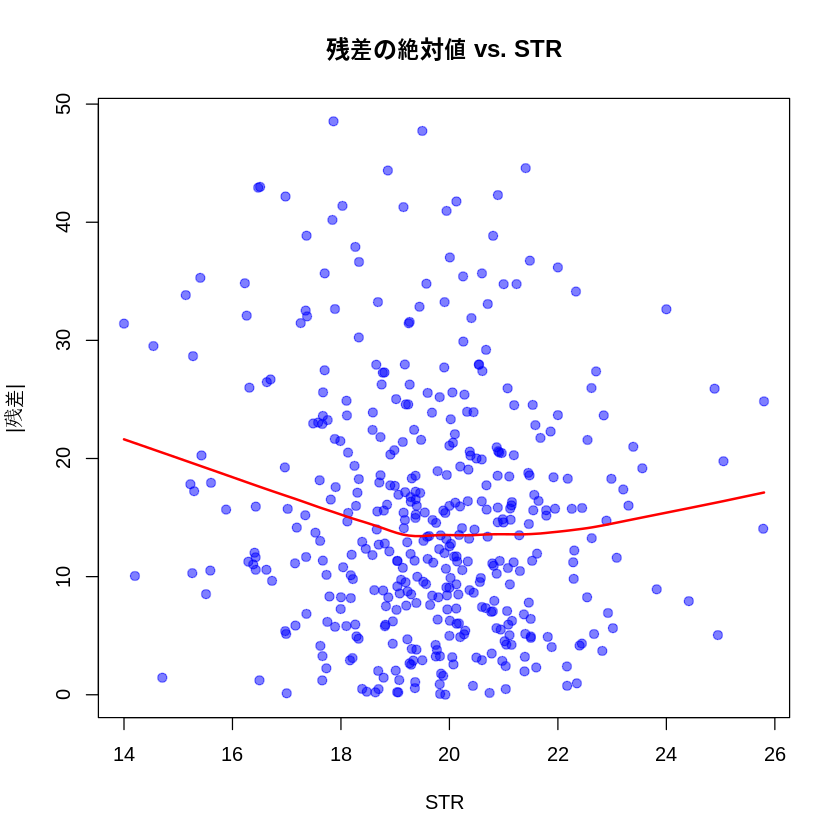

In [11]:
# 模範解答
# install.packages("lmtest")  # 必要に応じて
library(lmtest)

model <- lm(score ~ STR, data = CASchools)

# 1. 視覚的な確認
plot(CASchools$STR, abs(resid(model)),
     main = "残差の絶対値 vs. STR",
     xlab = "STR", ylab = "|残差|",
     pch = 19, col = rgb(0, 0, 1, 0.5))
lines(lowess(CASchools$STR, abs(resid(model))), col = "red", lwd = 2)

# 2. Breusch-Pagan検定
cat("=== Breusch-Pagan検定 ===", "\n")
bp_test <- bptest(model)
print(bp_test)

# 3. 解釈
cat("\n=== 解釈 ===", "\n")
if (bp_test$p.value < 0.05) {
  cat("p値 =", bp_test$p.value, "< 0.05\n")
  cat("帰無仮説（均一分散）を棄却。不均一分散の存在が示唆される。\n")
} else {
  cat("p値 =", bp_test$p.value, ">= 0.05\n")
  cat("帰無仮説（均一分散）を棄却できない。\n")
}

---
## 問題6: ロバスト標準誤差

不均一分散に対してロバストな標準誤差（White標準誤差）を使って推定を行います。

1. 通常の標準誤差とロバスト標準誤差を比較してください
2. coeftest()関数を使ってロバスト標準誤差での検定結果を確認

In [12]:
# 問題6の解答欄



### 模範解答

In [13]:
# 模範解答
# install.packages("sandwich")  # 必要に応じて
library(sandwich)
library(lmtest)

model <- lm(score ~ STR, data = CASchools)

# 1. 通常の標準誤差
cat("=== 通常の標準誤差 ===", "\n")
print(coeftest(model))

# 2. ロバスト標準誤差（HC1: Whiteの修正）
cat("\n=== ロバスト標準誤差 (HC1) ===", "\n")
robust_se <- coeftest(model, vcov = vcovHC(model, type = "HC1"))
print(robust_se)

# 比較
cat("\n=== 標準誤差の比較 ===", "\n")
cat("通常の SE(β̂₁):", summary(model)$coefficients[2, 2], "\n")
cat("ロバスト SE(β̂₁):", robust_se[2, 2], "\n")

=== 通常の標準誤差 === 



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 698.93295    9.46749 73.8245 < 2.2e-16 ***
STR          -2.27981    0.47983 -4.7513 2.783e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




=== ロバスト標準誤差 (HC1) === 



t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 698.93295   10.36436 67.4362 < 2.2e-16 ***
STR          -2.27981    0.51949 -4.3886 1.447e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




=== 標準誤差の比較 === 


通常の SE(β̂₁): 0.4798255 


ロバスト SE(β̂₁): 0.5194893 


---
## 問題7: 回帰係数の経済的有意性

統計的有意性と経済的（実質的）有意性の違いについて考察します。

score ~ STR モデルについて、

1. STRが1単位増加したときのスコアの変化を確認
2. STRが1標準偏差増加したときのスコアの変化を計算
3. この効果の大きさが実質的に重要かどうかを考察

In [14]:
# 問題7の解答欄



### 模範解答

In [15]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)

# 1. 1単位増加の効果
beta1 <- coef(model)[2]
cat("STRが1単位増加するとスコアは", round(beta1, 2), "点変化\n\n")

# 2. 1標準偏差増加の効果
sd_STR <- sd(CASchools$STR)
sd_score <- sd(CASchools$score)

effect_1sd <- beta1 * sd_STR
cat("STRの標準偏差:", round(sd_STR, 2), "\n")
cat("STRが1標準偏差増加するとスコアは", round(effect_1sd, 2), "点変化\n\n")

# 標準化係数
standardized_beta <- beta1 * (sd_STR / sd_score)
cat("標準化係数:", round(standardized_beta, 3), "\n")
cat("→ STRが1標準偏差増加するとスコアは", round(abs(standardized_beta), 3), 
    "標準偏差減少\n\n")

# 3. 考察
cat("=== 経済的有意性の考察 ===", "\n")
cat("スコアの平均:", round(mean(CASchools$score), 1), "\n")
cat("スコアの標準偏差:", round(sd_score, 1), "\n\n")
cat("STRを1減らす（教師を増やす）と約", round(abs(beta1), 2), "点のスコア向上。\n")
cat("これは統計的には有意だが、実質的な効果としては\n")
cat("必ずしも大きいとは言えない可能性がある。\n")
cat("政策的にはコストと効果のバランスを検討する必要がある。\n")

STRが1単位増加するとスコアは -2.28 点変化



STRの標準偏差: 1.89 


STRが1標準偏差増加するとスコアは -4.31 点変化



標準化係数: -0.226 


→ STRが1標準偏差増加するとスコアは 0.226 標準偏差減少



=== 経済的有意性の考察 === 


スコアの平均: 654.2 


スコアの標準偏差: 19.1 



STRを1減らす（教師を増やす）と約 2.28 点のスコア向上。


これは統計的には有意だが、実質的な効果としては


必ずしも大きいとは言えない可能性がある。


政策的にはコストと効果のバランスを検討する必要がある。


---
## 問題8: 第二種の過誤と検定力の計算

score ~ STR モデルで、「β₁ = -1」という具体的な値を検定する場合の検定力を計算します。

1. 帰無仮説 H₀: β₁ = -1 vs 対立仮説 H₁: β₁ ≠ -1 を検定
2. この検定の検定力を計算（真のβ₁が-2.28であると仮定）

In [16]:
# 問題8の解答欄



### 模範解答

In [17]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)
model_summary <- summary(model)

beta1_hat <- coef(model)[2]
SE_beta1 <- model_summary$coefficients[2, 2]
n <- nrow(CASchools)
df <- n - 2

# 1. H₀: β₁ = -1 の検定
beta1_null <- -1
t_stat <- (beta1_hat - beta1_null) / SE_beta1
p_value <- 2 * pt(-abs(t_stat), df = df)

cat("=== H₀: β₁ = -1 の検定 ===", "\n")
cat("t統計量 =", t_stat, "\n")
cat("p値 =", p_value, "\n")
if (p_value < 0.05) {
  cat("結論: 帰無仮説を棄却（β₁ ≠ -1）\n\n")
} else {
  cat("結論: 帰無仮説を棄却できない\n\n")
}

# 2. 検定力の計算
beta1_true <- -2.28  # 真の値と仮定
alpha <- 0.05
t_critical <- qt(1 - alpha/2, df = df)

# 非心t分布を使用
ncp <- (beta1_true - beta1_null) / SE_beta1  # 非心度パラメータ

# 検定力 = P(|T| > t_critical | H₁が真)
power <- 1 - pt(t_critical, df = df, ncp = ncp) + pt(-t_critical, df = df, ncp = ncp)

cat("=== 検定力の計算 ===", "\n")
cat("帰無仮説の値: β₁ =", beta1_null, "\n")
cat("真の値: β₁ =", beta1_true, "\n")
cat("非心度パラメータ:", ncp, "\n")
cat("検定力:", power, "\n")

=== H₀: β₁ = -1 の検定 === 


t統計量 = -2.667236 


p値 = 0.007944835 


結論: 帰無仮説を棄却（β₁ ≠ -1）



=== 検定力の計算 === 


帰無仮説の値: β₁ = -1 


真の値: β₁ = -2.28 


非心度パラメータ: -2.667636 


検定力: 0.7585184 


---
## 問題9: 予測の信頼区間と予測区間

STR = 20 のときのscoreについて、

1. 点予測値を計算
2. 平均値の95%信頼区間（E(Y|X=20）の区間推定）を計算
3. 個別予測の95%予測区間を計算
4. 信頼区間と予測区間の違いを説明

In [18]:
# 問題9の解答欄



### 模範解答

点予測値: 653.3368 



平均値の95%信頼区間:


       fit      lwr      upr
1 653.3368 651.5226 655.1509



個別予測の95%予測区間:


       fit     lwr      upr
1 653.3368 616.768 689.9056


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <af>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <94>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on '信頼区間と予測区間の比較' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in (function (s, units = "user", cex = NULL, font = NULL, vfont = NULL, :
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b4>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <e7>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in text.default(x, y, ...):
“conversion failure on '回帰直線' in 'mbcsToSbcs': dot substituted for <9a>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <bf>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <a1>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <a0>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on '信頼区間' in 'mbcsToSbcs': dot substituted for <93>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <8c>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <e9>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in text.default(x, y, ...):
“conversion failure on '予測区間' in 'mbcsToSbcs': dot substituted for <93>”



=== 違いの説明 === 


信頼区間: E(Y|X)の不確実性のみを反映


予測区間: E(Y|X)の不確実性 + 個別の誤差項の変動も反映


→ 予測区間は常に信頼区間より広い


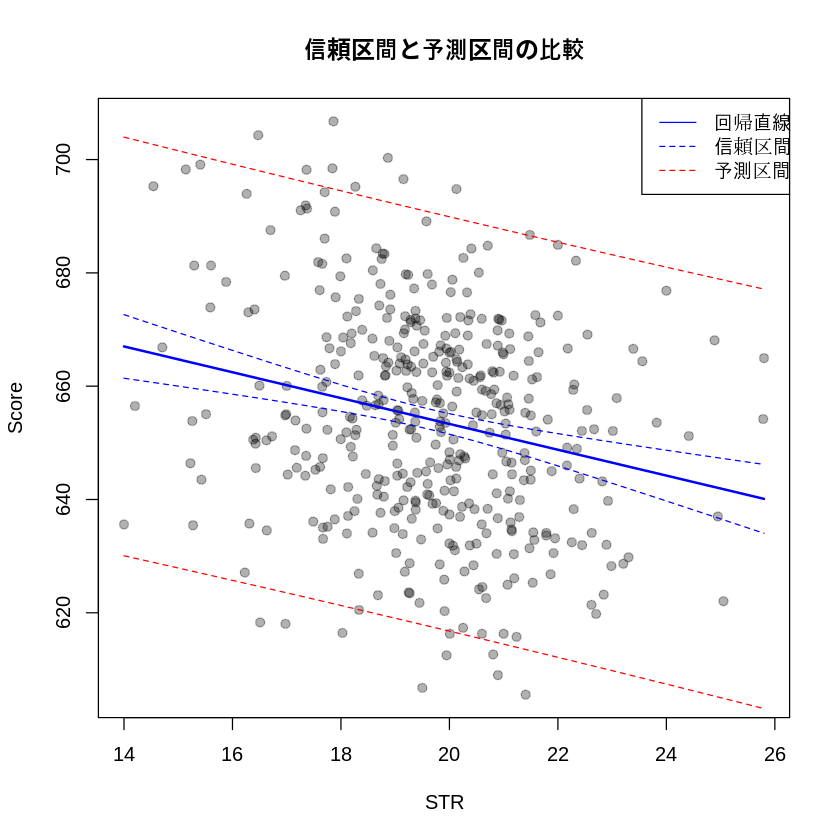

In [19]:
# 模範解答
model <- lm(score ~ STR, data = CASchools)
new_data <- data.frame(STR = 20)

# 1. 点予測
point_pred <- predict(model, newdata = new_data)
cat("点予測値:", point_pred, "\n\n")

# 2. 平均値の信頼区間
conf_interval <- predict(model, newdata = new_data, interval = "confidence", level = 0.95)
cat("平均値の95%信頼区間:\n")
print(conf_interval)

# 3. 予測区間
pred_interval <- predict(model, newdata = new_data, interval = "prediction", level = 0.95)
cat("\n個別予測の95%予測区間:\n")
print(pred_interval)

# 4. 視覚化
STR_range <- seq(min(CASchools$STR), max(CASchools$STR), length.out = 100)
new_data_range <- data.frame(STR = STR_range)
conf_bands <- predict(model, newdata = new_data_range, interval = "confidence")
pred_bands <- predict(model, newdata = new_data_range, interval = "prediction")

plot(CASchools$STR, CASchools$score,
     main = "信頼区間と予測区間の比較",
     xlab = "STR", ylab = "Score",
     pch = 19, col = rgb(0, 0, 0, 0.3))
lines(STR_range, conf_bands[, "fit"], col = "blue", lwd = 2)
lines(STR_range, conf_bands[, "lwr"], col = "blue", lty = 2)
lines(STR_range, conf_bands[, "upr"], col = "blue", lty = 2)
lines(STR_range, pred_bands[, "lwr"], col = "red", lty = 2)
lines(STR_range, pred_bands[, "upr"], col = "red", lty = 2)
legend("topright", legend = c("回帰直線", "信頼区間", "予測区間"),
       col = c("blue", "blue", "red"), lty = c(1, 2, 2))

cat("\n=== 違いの説明 ===", "\n")
cat("信頼区間: E(Y|X)の不確実性のみを反映\n")
cat("予測区間: E(Y|X)の不確実性 + 個別の誤差項の変動も反映\n")
cat("→ 予測区間は常に信頼区間より広い\n")

---
## 問題10: カテゴリカル変数による層別分析

CASchoolsデータを低所得層の割合（calworks）で3グループに分け、各グループでの回帰分析を行います。

1. calworks の3分位点でデータを3グループに分割
2. 各グループで score ~ STR の回帰分析を実行
3. グループ間で係数を比較し、考察を述べる

In [20]:
# 問題10の解答欄



### 模範解答

In [21]:
# 模範解答
# 1. 3グループに分割
quantiles <- quantile(CASchools$calworks, probs = c(1/3, 2/3))
CASchools$income_group <- cut(CASchools$calworks,
                               breaks = c(-Inf, quantiles[1], quantiles[2], Inf),
                               labels = c("低貧困率", "中貧困率", "高貧困率"))

cat("グループ別の観測数:\n")
print(table(CASchools$income_group))

# 2. 各グループでの回帰分析
results <- list()
for (group in levels(CASchools$income_group)) {
  subset_data <- CASchools[CASchools$income_group == group, ]
  model_group <- lm(score ~ STR, data = subset_data)
  results[[group]] <- coef(model_group)
  
  cat("\n=== グループ:", group, "===", "\n")
  print(summary(model_group)$coefficients)
}

# 3. 係数の比較
cat("\n=== 係数の比較 ===", "\n")
comparison <- data.frame(
  グループ = names(results),
  切片 = sapply(results, `[`, 1),
  傾き = sapply(results, `[`, 2)
)
print(comparison)

cat("\n=== 考察 ===", "\n")
cat("貧困率の低いグループでは、STRの影響が異なる可能性がある。\n")
cat("これは、学生教師比率以外の要因（家庭環境など）が\n")
cat("テストスコアに影響していることを示唆している。\n")

グループ別の観測数:



低貧困率 中貧困率 高貧困率 
     140      140      140 



=== グループ: 低貧困率 === 
              Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 734.211825  10.952931 67.033367 3.586976e-107
STR          -3.228891   0.559602 -5.769978  4.995299e-08

=== グループ: 中貧困率 === 
               Estimate Std. Error   t value     Pr(>|t|)
(Intercept) 663.4694287  12.712895 52.188695 9.700695e-93
STR          -0.6031886   0.640034 -0.942432 3.476184e-01

=== グループ: 高貧困率 === 
              Estimate Std. Error   t value      Pr(>|t|)
(Intercept) 682.414752 11.4097430 59.809827 1.452362e-100
STR          -2.175558  0.5775132 -3.767114  2.437712e-04



=== 係数の比較 === 


                     グループ     切片       傾き
低貧困率.(Intercept) 低貧困率 734.2118 -3.2288908
中貧困率.(Intercept) 中貧困率 663.4694 -0.6031886
高貧困率.(Intercept) 高貧困率 682.4148 -2.1755577



=== 考察 === 


貧困率の低いグループでは、STRの影響が異なる可能性がある。


これは、学生教師比率以外の要因（家庭環境など）が


テストスコアに影響していることを示唆している。
